# Quick Start

## Package and Data Prepare

The most common way to import easyidp package is:

In [1]:
import easyidp as idp

And then using the Lotus dataset as example

> It will download 3.3GB from Google Drive for the first time, please ensure your have enough disk space (>10GB) in your system cache disk.
> 
> You can using the following code to check where it downloads to:
> 
> ```python
> >>> idp.data.show_data_dir()
> ```
> 
> It will call your system default file manager to show the folder.

In [2]:
lotus = idp.data.Lotus()

If you run for the first time, it will download dataset automatically from google drive:

```python
>>> lotus = idp.data.Lotus()
Downloading...
From: https://drive.google.com/uc?id=1SJmp-bG5SZrwdeJL-RnnljM2XmMNMF0j
To: C:\Users\<username>\AppData\Local\easyidp.data\2017_tanashi_lotus.zip
100%|██████████| 3.58G/3.58G [00:46<00:00, 77.2MB/s]
```

Then the used file path can be obtained by:

```python
>>> lotus.photo
'C:\\Users\\<username>\\AppData\\Local\\easyidp.data\\2017_tanashi_lotus\\20170531\\photos'
>>> lotus.metashape.project
'C:\\Users\\<username>\\AppData\\Local\\easyidp.data\\2017_tanashi_lotus\\170531.Lotus.psx'
>>> lotus.pix4d.dom
'C:\\Users\\<username>\\AppData\\Local\\easyidp.data\\2017_tanashi_lotus\\20170531\\hasu_tanashi_20170531_Ins1RGB_30m_transparent_mosaic_group1.tif'
```

Please check `Python API > Data` for more details.

## Read ROI from Shapefile

Then open the shapefile `plot.shp`, the shp file looks like (red polygons):

![lotus_shp](../_static/images/data/2017_tanashi_lotus.png)

First, need to check which column of shapefile should be used as key:

In [3]:
idp.shp.show_shp_fields(lotus.shp)

  [-1]   [0] plot_id
------  -------------
     0      N1W1
     1      N1W2
     2      N1W3
   ...       ...
   109      S4E5
   110      S4E6
   111      S4E7


We can see, it only contains one column (-1 is the index), here we pass `0` or `"plot_id"` to `name_field` param to set it as index.

In [4]:
roi = idp.ROI(lotus.shp, name_field=0)

[shp][proj] Use projection [WGS 84] for loaded shapefile [plots.shp]


[shp] read shp [plots.shp]: 100%|██████████| 112/112 [00:00<00:00, 2427.87it/s]


Then check if it loads as expected:

In [5]:
roi.keys()

dict_keys(['N1W1', 'N1W2', 'N1W3', 'N1W4', 'N1W5', 'N1W6', 'N1W7', 'N1E1', 'N1E2', 'N1E3', 'N1E4', 'N1E5', 'N1E6', 'N1E7', 'N2W1', 'N2W2', 'N2W3', 'N2W4', 'N2W5', 'N2W6', 'N2W7', 'N2E1', 'N2E2', 'N2E3', 'N2E4', 'N2E5', 'N2E6', 'N2E7', 'N3W1', 'N3W2', 'N3W3', 'N3W4', 'N3W5', 'N3W6', 'N3W7', 'N3E1', 'N3E2', 'N3E3', 'N3E4', 'N3E5', 'N3E6', 'N3E7', 'N4W1', 'N4W2', 'N4W3', 'N4W4', 'N4W5', 'N4W6', 'N4W7', 'N4E1', 'N4E2', 'N4E3', 'N4E4', 'N4E5', 'N4E6', 'N4E7', 'S1W1', 'S1W2', 'S1W3', 'S1W4', 'S1W5', 'S1W6', 'S1W7', 'S1E1', 'S1E2', 'S1E3', 'S1E4', 'S1E5', 'S1E6', 'S1E7', 'S2W1', 'S2W2', 'S2W3', 'S2W4', 'S2W5', 'S2W6', 'S2W7', 'S2E1', 'S2E2', 'S2E3', 'S2E4', 'S2E5', 'S2E6', 'S2E7', 'S3W1', 'S3W2', 'S3W3', 'S3W4', 'S3W5', 'S3W6', 'S3W7', 'S3E1', 'S3E2', 'S3E3', 'S3E4', 'S3E5', 'S3E6', 'S3E7', 'S4W1', 'S4W2', 'S4W3', 'S4W4', 'S4W5', 'S4W6', 'S4W7', 'S4E1', 'S4E2', 'S4E3', 'S4E4', 'S4E5', 'S4E6', 'S4E7'])

In [6]:
roi["N1W1"]

array([[ 35.73475194, 139.54052962],
       [ 35.73475596, 139.54055106],
       [ 35.73473843, 139.54055592],
       [ 35.73473446, 139.54053438],
       [ 35.73475194, 139.54052962]])

Or you can also reference it by index:

In [7]:
roi[0]

array([[ 35.73475194, 139.54052962],
       [ 35.73475596, 139.54055106],
       [ 35.73473843, 139.54055592],
       [ 35.73473446, 139.54053438],
       [ 35.73475194, 139.54052962]])

Then get the height value from DSM

In [8]:
roi.get_z_from_dsm(lotus.metashape.dsm)
roi[0]

array([[3.68017757e+05, 3.95551108e+06, 9.73980865e+01],
       [3.68019702e+05, 3.95551150e+06, 9.73980865e+01],
       [3.68020113e+05, 3.95550955e+06, 9.73980865e+01],
       [3.68018158e+05, 3.95550914e+06, 9.73980865e+01],
       [3.68017757e+05, 3.95551108e+06, 9.73980865e+01]])

We can notice, the roi x and y values also changed. Because the ROI shp geo-coord is EPSG::4326 while the DSM is EPSG::32654

if you want keep the x and y value, you can:

```python
>>> roi.get_z_from_dsm(lotus.metashape.dsm, keep_crs=True)
>>> roi[0]
array([[ 35.73475194, 139.54052962,  97.39808655],
       [ 35.73475596, 139.54055106,  97.39808655],
       [ 35.73473843, 139.54055592,  97.39808655],
       [ 35.73473446, 139.54053438,  97.39808655],
       [ 35.73475194, 139.54052962,  97.39808655]])
```

But it is highly recommended to use the same CRS with the DOM/DSM, otherwise will raise ValueErrors in the later use.

```python
File d:\onedrive\program\github\easyidp\easyidp\geotiff.py:159, in GeoTiff.crop(self, roi, is_geo, save_folder)
    156     else:
    157         save_path = None
--> 159     imarray = self.crop_polygon(polygon_hv, is_geo, save_path)
    161     out_dict[k] = imarray
    163 return out_dict

File d:\onedrive\program\github\easyidp\easyidp\geotiff.py:212, in GeoTiff.crop_polygon(self, polygon_hv, is_geo, save_path)
    210 with tf.TiffFile(self.file_path) as tif:
    211     page = tif.pages[0]
...
--> 815     raise ValueError("h and w must be strictly positive.")
    817 i1, j1 = i0 + h, j0 + w
    818 if i0 < 0 or j0 < 0 or i1 >= im_height or j1 >= im_width:

ValueError: h and w must be strictly positive.
```

## Read and crop DOM

In [9]:
dom = idp.GeoTiff(lotus.metashape.dom)

Check the values:

In [10]:
dom.header

{'height': 6437,
 'width': 5804,
 'dim': 4,
 'nodata': 0,
 'dtype': dtype('uint8'),
 'tags': <tifffile.TiffTags @0x0000014B7A96D820>,
 'photometric': <PHOTOMETRIC.RGB: 2>,
 'planarconfig': <PLANARCONFIG.CONTIG: 1>,
 'compress': <COMPRESSION.LZW: 5>,
 'scale': [0.007384584904582574, 0.00738458490456083],
 'tie_point': [368014.58988527476, 3955521.320884819],
 'crs': <Derived Projected CRS: EPSG:32654>
 Name: WGS 84 / UTM zone 54N
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Between 138°E and 144°E, northern hemisphere between equator and 84°N, onshore and offshore. Japan. Russian Federation.
 - bounds: (138.0, 0.0, 144.0, 84.0)
 Coordinate Operation:
 - name: UTM zone 54N
 - method: Transverse Mercator
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich}

Crop the DOM by ROI:

In [12]:
dom_parts = roi.crop(dom)
dom_parts.keys()

dict_keys(['N1W1', 'N1W2', 'N1W3', 'N1W4', 'N1W5', 'N1W6', 'N1W7', 'N1E1', 'N1E2', 'N1E3', 'N1E4', 'N1E5', 'N1E6', 'N1E7', 'N2W1', 'N2W2', 'N2W3', 'N2W4', 'N2W5', 'N2W6', 'N2W7', 'N2E1', 'N2E2', 'N2E3', 'N2E4', 'N2E5', 'N2E6', 'N2E7', 'N3W1', 'N3W2', 'N3W3', 'N3W4', 'N3W5', 'N3W6', 'N3W7', 'N3E1', 'N3E2', 'N3E3', 'N3E4', 'N3E5', 'N3E6', 'N3E7', 'N4W1', 'N4W2', 'N4W3', 'N4W4', 'N4W5', 'N4W6', 'N4W7', 'N4E1', 'N4E2', 'N4E3', 'N4E4', 'N4E5', 'N4E6', 'N4E7', 'S1W1', 'S1W2', 'S1W3', 'S1W4', 'S1W5', 'S1W6', 'S1W7', 'S1E1', 'S1E2', 'S1E3', 'S1E4', 'S1E5', 'S1E6', 'S1E7', 'S2W1', 'S2W2', 'S2W3', 'S2W4', 'S2W5', 'S2W6', 'S2W7', 'S2E1', 'S2E2', 'S2E3', 'S2E4', 'S2E5', 'S2E6', 'S2E7', 'S3W1', 'S3W2', 'S3W3', 'S3W4', 'S3W5', 'S3W6', 'S3W7', 'S3E1', 'S3E2', 'S3E3', 'S3E4', 'S3E5', 'S3E6', 'S3E7', 'S4W1', 'S4W2', 'S4W3', 'S4W4', 'S4W5', 'S4W6', 'S4W7', 'S4E1', 'S4E2', 'S4E3', 'S4E4', 'S4E5', 'S4E6', 'S4E7'])

It has the same key as the ROI.

And to visualize the cropped results:

In [13]:
import matplotlib.pyplot as plt

In [14]:
print(type(dom_parts["N1W1"]), dom_parts["N1W1"].shape)

<class 'numpy.ndarray'> (320, 319, 4)


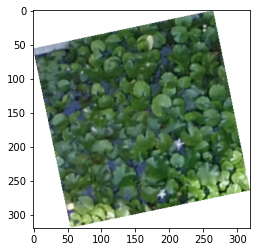

In [15]:
plt.imshow(dom_parts["N1W1"])

It you want to save the cropped GeoTiff, please pass the `save_folder` parameter when cropping

```python
>>> dom_parts = roi.crop(dom, save_folder=r"expected\save\folder")
```

It will save all cropped sections to GeoTiff files with geo-offset (you can overlap the cropped DOM perfectly on the original DOM)

However, you can not save the outputs `dom_parts["N1W1"]` with geo-offset, it can only be save as a common image via `plt.imsave()`.

## Read and crop point cloud

Crop the PCD by ROI: (will cost a half minuts to operate on the large point cloud)

In [11]:
pcd = idp.PointCloud(lotus.metashape.pcd)
pcd

                   x            y        z  r    g    b        nx      ny      nz
       0  368016.142  3955509.827   94.017  129  132  147  nodata  nodata  nodata
       1  368016.142  3955509.827   94.017  129  132  147  nodata  nodata  nodata
       2  368016.142  3955509.827   94.017  129  132  147  nodata  nodata  nodata
     ...     ...          ...      ...      ...  ...  ...     ...     ...     ...
10158190  368056.169  3955481.725   97.425  174  163  149  nodata  nodata  nodata
10158191  368056.51   3955481.904   97.44   166  153  139  nodata  nodata  nodata
10158192  368056.538  3955481.486   97.447  97   112  72   nodata  nodata  nodata

In [16]:
pcd_parts = roi.crop(pcd)

d:\onedrive\program\github\easyidp\easyidp\pointcloud.py:135: UserWarning: This will not change the value of point xyz values, if you want to just change offset value, please operate `pcd._offset = offset; pcd._update_btf_print()` directly
  warnings.warn("This will not change the value of point xyz values, if you want to just change offset value, please operate `pcd._offset = offset; pcd._update_btf_print()` directly")


In [17]:
pcd_parts.keys()

dict_keys(['N1W1', 'N1W2', 'N1W3', 'N1W4', 'N1W5', 'N1W6', 'N1W7', 'N1E1', 'N1E2', 'N1E3', 'N1E4', 'N1E5', 'N1E6', 'N1E7', 'N2W1', 'N2W2', 'N2W3', 'N2W4', 'N2W5', 'N2W6', 'N2W7', 'N2E1', 'N2E2', 'N2E3', 'N2E4', 'N2E5', 'N2E6', 'N2E7', 'N3W1', 'N3W2', 'N3W3', 'N3W4', 'N3W5', 'N3W6', 'N3W7', 'N3E1', 'N3E2', 'N3E3', 'N3E4', 'N3E5', 'N3E6', 'N3E7', 'N4W1', 'N4W2', 'N4W3', 'N4W4', 'N4W5', 'N4W6', 'N4W7', 'N4E1', 'N4E2', 'N4E3', 'N4E4', 'N4E5', 'N4E6', 'N4E7', 'S1W1', 'S1W2', 'S1W3', 'S1W4', 'S1W5', 'S1W6', 'S1W7', 'S1E1', 'S1E2', 'S1E3', 'S1E4', 'S1E5', 'S1E6', 'S1E7', 'S2W1', 'S2W2', 'S2W3', 'S2W4', 'S2W5', 'S2W6', 'S2W7', 'S2E1', 'S2E2', 'S2E3', 'S2E4', 'S2E5', 'S2E6', 'S2E7', 'S3W1', 'S3W2', 'S3W3', 'S3W4', 'S3W5', 'S3W6', 'S3W7', 'S3E1', 'S3E2', 'S3E3', 'S3E4', 'S3E5', 'S3E6', 'S3E7', 'S4W1', 'S4W2', 'S4W3', 'S4W4', 'S4W5', 'S4W6', 'S4W7', 'S4E1', 'S4E2', 'S4E3', 'S4E4', 'S4E5', 'S4E6', 'S4E7'])

In [18]:
pcd_parts["N1W1"]

                x            y        z  r       g       b           nx      ny      nz
    0  368017.889  3955510.812   97.214  nodata  nodata  nodata  nodata  nodata  nodata
    1  368017.888  3955510.8     97.218  nodata  nodata  nodata  nodata  nodata  nodata
    2  368017.897  3955510.964   97.22   nodata  nodata  nodata  nodata  nodata  nodata
  ...     ...          ...      ...      ...     ...     ...        ...     ...     ...
35745  368020.003  3955509.546   97.558  nodata  nodata  nodata  nodata  nodata  nodata
35746  368020.046  3955509.665   97.436  nodata  nodata  nodata  nodata  nodata  nodata
35747  368019.914  3955509.974   97.444  nodata  nodata  nodata  nodata  nodata  nodata

Similarly, you can pass the `save_folder` parameter to save the cropped point cloud

```python
>>> pcd_parts = roi.crop(pcd, save_folder=r"expected\save\folder")
```

## Read SfM project and backward projection

### For Metashape

In [19]:
ms = idp.Metashape(lotus.metashape.project, chunk_id=0)

In [20]:
img_dict = roi.back2raw(ms)

In [21]:
img_dict.keys()

dict_keys(['N1W1', 'N1W2', 'N1W3', 'N1W4', 'N1W5', 'N1W6', 'N1W7', 'N1E1', 'N1E2', 'N1E3', 'N1E4', 'N1E5', 'N1E6', 'N1E7', 'N2W1', 'N2W2', 'N2W3', 'N2W4', 'N2W5', 'N2W6', 'N2W7', 'N2E1', 'N2E2', 'N2E3', 'N2E4', 'N2E5', 'N2E6', 'N2E7', 'N3W1', 'N3W2', 'N3W3', 'N3W4', 'N3W5', 'N3W6', 'N3W7', 'N3E1', 'N3E2', 'N3E3', 'N3E4', 'N3E5', 'N3E6', 'N3E7', 'N4W1', 'N4W2', 'N4W3', 'N4W4', 'N4W5', 'N4W6', 'N4W7', 'N4E1', 'N4E2', 'N4E3', 'N4E4', 'N4E5', 'N4E6', 'N4E7', 'S1W1', 'S1W2', 'S1W3', 'S1W4', 'S1W5', 'S1W6', 'S1W7', 'S1E1', 'S1E2', 'S1E3', 'S1E4', 'S1E5', 'S1E6', 'S1E7', 'S2W1', 'S2W2', 'S2W3', 'S2W4', 'S2W5', 'S2W6', 'S2W7', 'S2E1', 'S2E2', 'S2E3', 'S2E4', 'S2E5', 'S2E6', 'S2E7', 'S3W1', 'S3W2', 'S3W3', 'S3W4', 'S3W5', 'S3W6', 'S3W7', 'S3E1', 'S3E2', 'S3E3', 'S3E4', 'S3E5', 'S3E6', 'S3E7', 'S4W1', 'S4W2', 'S4W3', 'S4W4', 'S4W5', 'S4W6', 'S4W7', 'S4E1', 'S4E2', 'S4E3', 'S4E4', 'S4E5', 'S4E6', 'S4E7'])

In [22]:
img_dict["N1W1"]

{'DJI_0479': array([[  43.93882293, 1247.04742117],
        [  69.04076173,  972.90860269],
        [ 353.26968456,  993.31308266],
        [ 328.12327615, 1267.41006822],
        [  43.93882293, 1247.04742117]]),
 'DJI_0480': array([[ 655.38102917, 1273.02094416],
        [ 681.19591831,  996.49593214],
        [ 965.61742462, 1019.56247468],
        [ 939.90459546, 1296.06240452],
        [ 655.38102917, 1273.02094416]]),
 'DJI_0481': array([[1024.4474603 , 1442.10706144],
        [1043.52418775, 1159.42352247],
        [1331.68420964, 1177.41279188],
        [1312.55991979, 1460.05410169],
        [1024.4474603 , 1442.10706144]]),
 'DJI_0482': array([[ 924.41357117, 2201.23271013],
        [ 942.64102926, 1910.46756108],
        [1235.9964874 , 1923.81062042],
        [1217.81545691, 2214.52491781],
        [ 924.41357117, 2201.23271013]]),
 'DJI_0483': array([[ 842.91005343, 2972.19982192],
        [ 861.6346649 , 2676.50857116],
        [1156.40728776, 2686.81809904],
        [113

Preview the results:

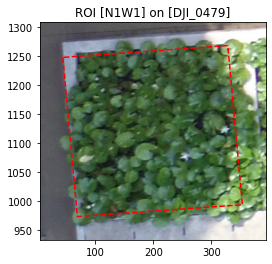

In [23]:
fig, ax = plt.subplots(1,1)

img_np = plt.imread(ms.photos["DJI_0479"].path)
img_coord = img_dict['N1W1']['DJI_0479']
im_xmin, im_ymin = img_coord.min(axis=0)
im_xmax, im_ymax = img_coord.max(axis=0)

buffer=40

ax.imshow(img_np)
ax.plot(*img_coord.T, '--r')

ax.set_xlim(im_xmin-buffer, im_xmax+buffer)
ax.set_ylim(im_ymin-buffer, im_ymax+buffer)
ax.set_title(f"ROI [N1W1] on [DJI_0479]")

plt.show()

### For Pix4D

In [24]:
p4d = idp.Pix4D(project_path=lotus.pix4d.project, 
                raw_img_folder=lotus.photo,
                param_folder=lotus.pix4d.param)

In [25]:
img_dict_p4d = roi.back2raw(p4d)
img_dict_p4d.keys()

dict_keys(['N1W1', 'N1W2', 'N1W3', 'N1W4', 'N1W5', 'N1W6', 'N1W7', 'N1E1', 'N1E2', 'N1E3', 'N1E4', 'N1E5', 'N1E6', 'N1E7', 'N2W1', 'N2W2', 'N2W3', 'N2W4', 'N2W5', 'N2W6', 'N2W7', 'N2E1', 'N2E2', 'N2E3', 'N2E4', 'N2E5', 'N2E6', 'N2E7', 'N3W1', 'N3W2', 'N3W3', 'N3W4', 'N3W5', 'N3W6', 'N3W7', 'N3E1', 'N3E2', 'N3E3', 'N3E4', 'N3E5', 'N3E6', 'N3E7', 'N4W1', 'N4W2', 'N4W3', 'N4W4', 'N4W5', 'N4W6', 'N4W7', 'N4E1', 'N4E2', 'N4E3', 'N4E4', 'N4E5', 'N4E6', 'N4E7', 'S1W1', 'S1W2', 'S1W3', 'S1W4', 'S1W5', 'S1W6', 'S1W7', 'S1E1', 'S1E2', 'S1E3', 'S1E4', 'S1E5', 'S1E6', 'S1E7', 'S2W1', 'S2W2', 'S2W3', 'S2W4', 'S2W5', 'S2W6', 'S2W7', 'S2E1', 'S2E2', 'S2E3', 'S2E4', 'S2E5', 'S2E6', 'S2E7', 'S3W1', 'S3W2', 'S3W3', 'S3W4', 'S3W5', 'S3W6', 'S3W7', 'S3E1', 'S3E2', 'S3E3', 'S3E4', 'S3E5', 'S3E6', 'S3E7', 'S4W1', 'S4W2', 'S4W3', 'S4W4', 'S4W5', 'S4W6', 'S4W7', 'S4E1', 'S4E2', 'S4E3', 'S4E4', 'S4E5', 'S4E6', 'S4E7'])

In [26]:
img_dict_p4d["N1W1"]

{'DJI_0479.JPG': array([[  27.56282888, 1241.16569944],
        [  54.21857056,  964.6301645 ],
        [ 342.00343998,  985.13562898],
        [ 315.56101918, 1261.57750822],
        [  27.56282888, 1241.16569944]]),
 'DJI_0480.JPG': array([[ 645.77546442, 1267.6142243 ],
        [ 672.35987768,  988.481927  ],
        [ 960.33965449, 1011.59461423],
        [ 934.08750029, 1290.66311539],
        [ 645.77546442, 1267.6142243 ]]),
 'DJI_0481.JPG': array([[1019.83954249, 1437.75758785],
        [1039.6025872 , 1152.43035446],
        [1331.07406311, 1170.42436996],
        [1311.53518522, 1455.69664434],
        [1019.83954249, 1437.75758785]]),
 'DJI_0482.JPG': array([[ 918.27475763, 2208.02551085],
        [ 937.17932181, 1913.38270762],
        [1234.39182252, 1926.51754858],
        [1215.84664066, 2221.03854072],
        [ 918.27475763, 2208.02551085]]),
 'DJI_0483.JPG': array([[ 836.02762953, 2990.21503818],
        [ 855.54216212, 2689.76938548],
        [1154.17408166, 2699.682

Check the results:

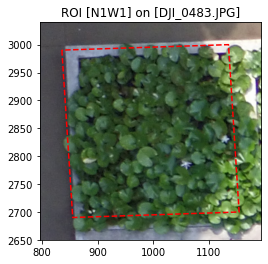

In [27]:
fig, ax = plt.subplots(1,1)

img_np = plt.imread(p4d.photos["DJI_0483.JPG"].path)
img_coord = img_dict_p4d['N1W1']['DJI_0483.JPG']
im_xmin, im_ymin = img_coord.min(axis=0)
im_xmax, im_ymax = img_coord.max(axis=0)

buffer=40

ax.imshow(img_np)
ax.plot(*img_coord.T, '--r')

ax.set_xlim(im_xmin-buffer, im_xmax+buffer)
ax.set_ylim(im_ymin-buffer, im_ymax+buffer)
ax.set_title(f"ROI [N1W1] on [DJI_0483.JPG]")

plt.show()

### Find the best backword image

You can notice that for each ROI, it will backword projected to several raw images:

In [34]:
len(img_dict["N1W1"])

17

How to find the best 3 or 5 images? Here you can calculate the distance from the image to the ROI, here we assume the shorter the better (idealy, UAV image just above the ROI region, the ROI is in the image center).

**An easy-to-use API will be provided soon**

In [29]:
import numpy as np

In [30]:
dist_thresh = 10  # distance threshold is 2m 
num = 3  # only keep 3 images
roi_name = "N1W1"

In [31]:
dist_geo = []
dist_name = []

img_dict_sort = {}
plot_geo = roi[roi_name]

cam_pos = ms.get_photo_position(to_crs=dom.header["crs"])

for img_name in img_dict[roi_name]:
    xmin_geo, ymin_geo = plot_geo[:,0:2].min(axis=0)
    xmax_geo, ymax_geo = plot_geo[:,0:2].max(axis=0)

    xctr_geo = (xmax_geo + xmin_geo) / 2
    yctr_geo = (ymax_geo + ymin_geo) / 2

    ximg_geo, yimg_geo, _ = cam_pos[img_name]

    image_plot_dist = np.sqrt((ximg_geo-xctr_geo) ** 2 + (yimg_geo - yctr_geo) ** 2)

    if dist_thresh is not None and image_plot_dist > dist_thresh:
        # skip those image-plot geo distance greater than threshold
        continue
    else:
        # if not given dist_thresh, record all
        dist_geo.append(image_plot_dist)
        dist_name.append(img_name)

if num is None:
    # not specify num, use all
    num = len(dist_name)
else:
    num = min(len(dist_name), num)

dist_geo_idx = np.asarray(dist_geo).argsort()[:num]
img_dict_sort = {dist_name[idx]:img_dict[roi_name][dist_name[idx]] for idx in dist_geo_idx}

In [32]:
img_dict_sort

{'DJI_0500': array([[1922.56474876, 2186.54825025],
        [1931.87731451, 1925.40617   ],
        [2192.17506086, 1934.43933741],
        [2182.74770712, 2195.87846278],
        [1922.56474876, 2186.54825025]]),
 'DJI_0517': array([[2865.83290547, 2151.97907123],
        [2592.43596025, 2169.39339611],
        [2574.8201995 , 1895.17518703],
        [2848.47968653, 1878.83459257],
        [2865.83290547, 2151.97907123]]),
 'DJI_0501': array([[1964.74215526, 1514.46594802],
        [1974.95422194, 1258.05648779],
        [2233.01780706, 1269.93359123],
        [2222.62945546, 1526.63268613],
        [1964.74215526, 1514.46594802]])}

Here is the best 3 image that match "distance from ROI to image" < 10m, and the first one is the closest.

Check the result:

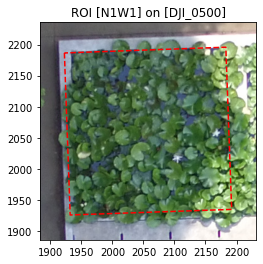

In [33]:
fig, ax = plt.subplots(1,1)

img_np = plt.imread(ms.photos["DJI_0500"].path)
img_coord = img_dict['N1W1']['DJI_0500']
im_xmin, im_ymin = img_coord.min(axis=0)
im_xmax, im_ymax = img_coord.max(axis=0)

buffer=40

ax.imshow(img_np)
ax.plot(*img_coord.T, '--r')

ax.set_xlim(im_xmin-buffer, im_xmax+buffer)
ax.set_ylim(im_ymin-buffer, im_ymax+buffer)
ax.set_title(f"ROI [N1W1] on [DJI_0500]")

plt.show()